In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [248]:
data = pd.read_csv("Minute_data_F.csv")
data

,date,time_m,time_m_nano,sym_root,sym_suffix,qu_cond,natbbo_ind,qu_source,nbbo_qu_cond,best_bid,best_bidsizeshares,best_ask,best_asksizeshares,time_rank
0,2021-09-30,04:00:00.016496,128,F,NaN,R,U,C,NaN,11.54,200.0,14.48,2600.0,1
1,2021-09-30,04:02:06.578113,24,F,NaN,R,U,C,NaN,14.36,400.0,14.40,200.0,1
2,2021-09-30,04:03:03.544752,128,F,NaN,R,U,C,NaN,14.42,600.0,14.45,700.0,1
3,2021-09-30,04:04:51.459206,632,F,NaN,R,U,C,NaN,14.42,600.0,14.45,600.0,1
4,2021-09-30,04:05:02.407123,200,F,NaN,R,U,C,NaN,14.42,400.0,14.45,600.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200675,2022-09-30,19:53:00.422458,112,F,NaN,R,U,C,NaN,11.20,5300.0,11.21,16500.0,1
200676,2022-09-30,19:54:00.214454,272,F,NaN,R,U,C,NaN,11.20,8500.0,11.21,16500.0,1
200677,2022-09-30,19:58:47.250492,416,F,NaN,R,U,C,NaN,11.20,800.0,11.21,16000.0,1
200678,2022-09-30,19:59:22.183307,264,F,NaN,R,U,C,NaN,11.20,800.0,11.21,15800.0,1


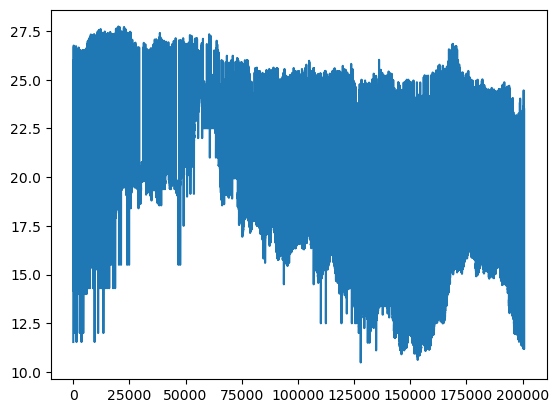

In [249]:
#x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in sorted_data["date"]]
plt.plot(data["best_bid"]) # stock split, we will probably have to adjust that manually

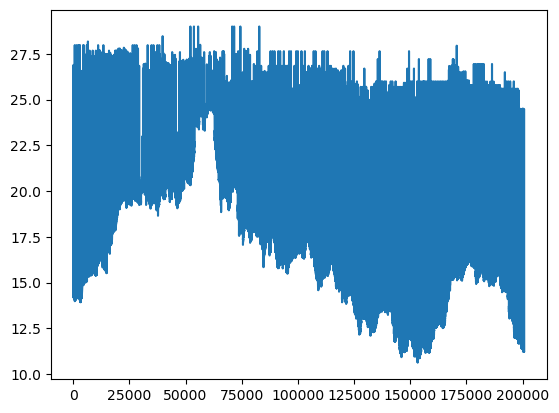

In [250]:
plt.plot(data["best_ask"])

In [163]:
a = data["best_ask"]-data["best_ask"].shift(1)
#sorted(a) # is -77 in one minute realistic? Flashcrash? Not more than 10% could also be fast information diffusion
a
min_index = a.idxmin()
print(a[min_index])


-2127.85


In [164]:
data[min_index-5:min_index+5] #stock split on 2022-08-25 was a 3-for-1 split

,date,time_m,time_m_nano,sym_root,sym_suffix,qu_cond,natbbo_ind,qu_source,nbbo_qu_cond,best_bid,best_bidsizeshares,best_ask,best_asksizeshares,time_rank
104886,2022-07-15,19:52:24.334133,422,GOOG,L,R,4,N,NaN,2238.50,100.0,2243.00,100.0,1
104887,2022-07-15,19:53:07.822403,321,GOOG,L,R,4,N,NaN,2238.50,100.0,2243.00,100.0,1
104888,2022-07-15,19:54:25.186577,151,GOOG,L,R,4,N,NaN,2238.50,100.0,2243.00,100.0,1
104889,2022-07-15,19:57:23.390397,409,GOOG,L,R,4,N,NaN,2239.00,100.0,2243.00,100.0,1
104890,2022-07-15,19:59:55.207965,980,GOOG,L,R,4,N,NaN,2239.00,200.0,2243.00,100.0,1
104891,2022-07-18,04:00:00.019122,597,GOOG,NaN,R,4,N,NaN,113.25,2000.0,115.15,400.0,1
104892,2022-07-18,04:01:09.077185,393,GOOG,L,R,4,N,NaN,113.04,100.0,113.48,400.0,1
104893,2022-07-18,04:02:11.850897,103,GOOG,L,R,2,N,NaN,113.10,100.0,113.47,100.0,1
104894,2022-07-18,04:03:04.187431,346,GOOG,NaN,R,2,N,NaN,112.00,2100.0,114.00,100.0,1
104895,2022-07-18,04:04:43.259909,966,GOOG,L,R,2,N,NaN,113.10,300.0,113.40,500.0,1


In [165]:
data.iloc[min_index:,9] = data.iloc[min_index:,9]*20 #multiply all prices after stock split by ratio of stock split to account for it
data.iloc[min_index:,11] = data.iloc[min_index:,11]*20
data[min_index-5:min_index+5]

,date,time_m,time_m_nano,sym_root,sym_suffix,qu_cond,natbbo_ind,qu_source,nbbo_qu_cond,best_bid,best_bidsizeshares,best_ask,best_asksizeshares,time_rank
104886,2022-07-15,19:52:24.334133,422,GOOG,L,R,4,N,NaN,2238.5,100.0,2243.0,100.0,1
104887,2022-07-15,19:53:07.822403,321,GOOG,L,R,4,N,NaN,2238.5,100.0,2243.0,100.0,1
104888,2022-07-15,19:54:25.186577,151,GOOG,L,R,4,N,NaN,2238.5,100.0,2243.0,100.0,1
104889,2022-07-15,19:57:23.390397,409,GOOG,L,R,4,N,NaN,2239.0,100.0,2243.0,100.0,1
104890,2022-07-15,19:59:55.207965,980,GOOG,L,R,4,N,NaN,2239.0,200.0,2243.0,100.0,1
104891,2022-07-18,04:00:00.019122,597,GOOG,NaN,R,4,N,NaN,2265.0,2000.0,2303.0,400.0,1
104892,2022-07-18,04:01:09.077185,393,GOOG,L,R,4,N,NaN,2260.8,100.0,2269.6,400.0,1
104893,2022-07-18,04:02:11.850897,103,GOOG,L,R,2,N,NaN,2262.0,100.0,2269.4,100.0,1
104894,2022-07-18,04:03:04.187431,346,GOOG,NaN,R,2,N,NaN,2240.0,2100.0,2280.0,100.0,1
104895,2022-07-18,04:04:43.259909,966,GOOG,L,R,2,N,NaN,2262.0,300.0,2268.0,500.0,1


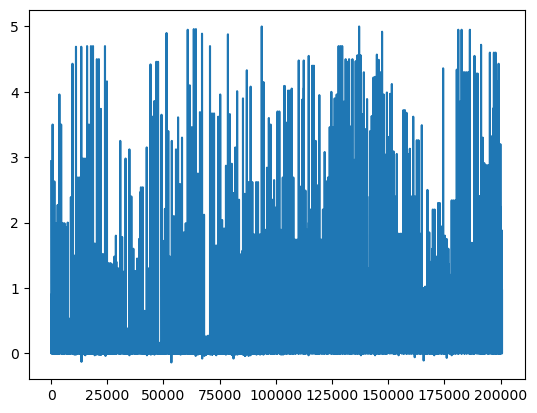

In [251]:
#check if there are crazy spreads
plt.plot(data["best_ask"]-data["best_bid"])

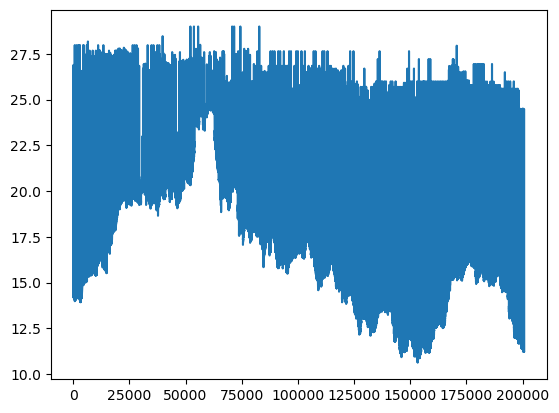

In [252]:
plt.plot(data["best_ask"]) #looks good now?


In [253]:
data.to_csv('Minute_data_'+str(data["sym_root"][1])+'_cleaned'+'.csv', index=False) # save data